# 데이터 정의

|  x1    |   x2    |  y  |
|:-------:|:-------:|:---:|
| 0.8147  | 0.8576  |  1  |
| 0.9058  | 0.9706  |  1  |
| 0.1270  | 0.2572  |  0  |
| 0.9134  | 0.8854  |  1  |
| 0.6324  | 0.8003  |  0  |
| 0.0975  | 0.1419  |  0  |
| 0.2785  | 0.4218  |  0  |
| 0.5469  | 0.9157  |  1  |
| 0.9575  | 0.7922  |  0  |
| 0.9649  | 0.9595  |  1  |


In [13]:
import numpy as np

# 데이터 정의
x1 = [
    0.8147, 0.9085, 0.127, 0.9134, 0.6324, 0.0975, 0.2785, 0.5469, 0.9575, 0.9649
]
x2 = [
    0.8576, 0.9706, 0.2572, 0.8854, 0.8003, 0.1419, 0.4218, 0.9157, 0.7922, 0.9595
]

y = [1, 1, 0, 1, 0, 0, 0, 1, 0, 1]


## 산점도를 그려 선형적인지. Decision Boundary로 완벽히 나눌 수 있는 문제인지 파악하기

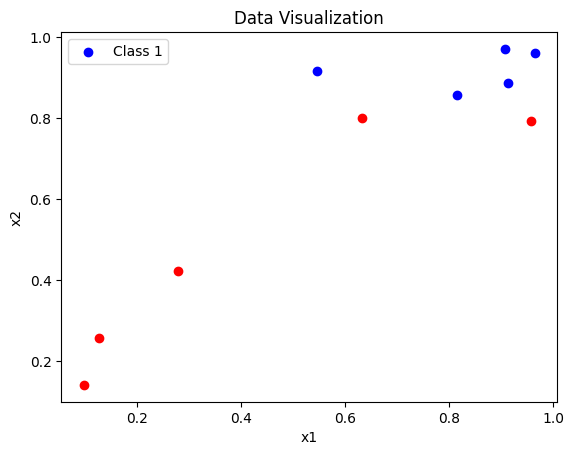

In [14]:
import matplotlib.pyplot as plt

for i in range(len(y)):
    if y[i] == 1:
        plt.scatter(x1[i], x2[i], color='blue', label='Class 1' if i == 0 else "")
    else:
        plt.scatter(x1[i], x2[i], color='red', label='Class 0' if i == 0 else "")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Data Visualization")
plt.show()


Logistic Regression에 대한 궁금함인데,

로지스틱 회귀는 GD 방식으로 loss줄이잖아.(물론 MLE도 있지만?)
근데, 모든 파라미터에 대해서 이 loss function을 적용하면 오래걸리니까 Matrix form으로 바꿔서 한 번에 모든 파마미터 update와 prediction을 한번에 하는 거라고 생각했어

위 생각에서 기인해서 2개의 샘플데이터에 대해서 로지스틱 회귀를 돌려봤는데,  단지 행렬 연산만 한다고 해서 고작 2개(각각 1x10)) 샘플데이터에 대해서도 회귀 분류를 정확히 못해냈어.

행렬 연산으로 바로 될거라고 생각했는데 내가 뭘 잘못 생각한건지 이해가 안가면 보자..


### A
수식을 보면 한 번의 행렬 연산에 한 번의 Learning rate를 곱한다. 즉, 단 한번의 GD가 이루어진 것이다. 즉, repeat하게 epoch수를 늘려주어야 한다. loss가 최대한 줄어들도록.

X Shape : (10, 3)
y Shape : (10, 1)
Weights Shape: (3, 1)
Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4050
Epoch 200, Loss: 0.3627
Epoch 300, Loss: 0.3380
Epoch 400, Loss: 0.3194
Epoch 500, Loss: 0.3044
Epoch 600, Loss: 0.2918
Epoch 700, Loss: 0.2810
Epoch 800, Loss: 0.2716
Epoch 900, Loss: 0.2631

Final weights:
[-9.58565457  0.19108295 11.89466732]

Predictions: [1 1 0 1 1 0 0 1 1 1]
Actual: [1 1 0 1 0 0 0 1 0 1]


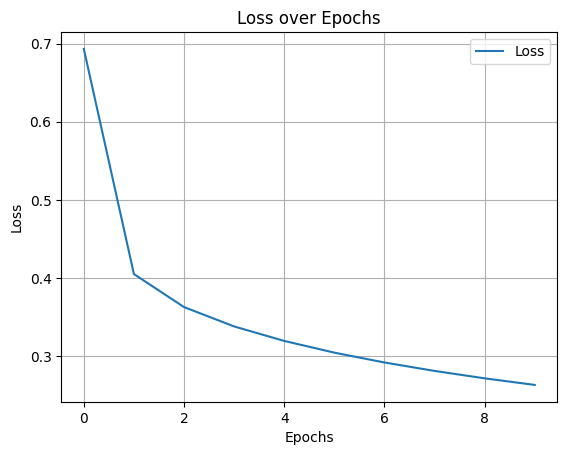

In [42]:
# 데이터 준비
X = np.column_stack((np.ones(len(x1)), x1, x2))  # (10x3 행렬), 절편 추가
print(f"X Shape : {X.shape}")
y = np.array(y).reshape(-1, 1)  # (10x1 벡터)
print(f"y Shape : {y.shape}")
m, n = X.shape  # 샘플 수, 피처 수

# 가중치 초기화
weights = np.zeros((n, 1))  # (3x1 벡터) #TODO: 10개 존재해야하는거 아닌가(O)
print(f"Weights Shape: {weights.shape}")
# Sigmoid 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression (행렬 연산)
def logistic_regression(X, y, weights, lr, epochs):
    losses = []  # 손실 값을 저장할 리스트
    for epoch in range(epochs):
        # 1. 예측값 계산
        z = np.dot(X, weights)  # (10x1 벡터)
        y_hat = sigmoid(z)  # (10x1 벡터)

        # 2. 손실 기울기 계산
        gradient = np.dot(X.T, (y_hat - y))  # (3x1 벡터)

        # 3. 가중치 업데이트
        weights -= lr * gradient

        # 4. 100번째 에포크마다 손실 출력
        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
            losses.append(loss)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, losses



# 모델 훈련
weights, losses  = logistic_regression(X, y, weights, lr=0.1, epochs=1000)

# 최종 결과 출력
print("\nFinal weights:")
print(weights.ravel())

# 최종 예측
z = np.dot(X, weights)
y_pred = sigmoid(z) >= 0.5  # 0.5 기준으로 분류
print("\nPredictions:", y_pred.astype(int).ravel())
print("Actual:", y.ravel())

# 손실 그래프 그리기
plt.plot(range(len(losses)), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# 모델 성능 평가 confusion matrix 
True Negative (TN): 5<br>
실제 Class 0인 샘플을 모델이 Class 0으로 정확히 예측한 수.<br><br>
False Positive (FP): 0<br>
실제 Class 0인 샘플을 모델이 Class 1로 잘못 예측한 수.<br><br>
False Negative (FN): 0<br>
실제 Class 1인 샘플을 모델이 Class 0으로 잘못 예측한 수.<br><br>
True Positive (TP): 5<br>
실제 Class 1인 샘플을 모델이 Class 1으로 정확히 예측한 수.<br><br>


Confusion Matrix:
[[3 2]
 [0 5]]


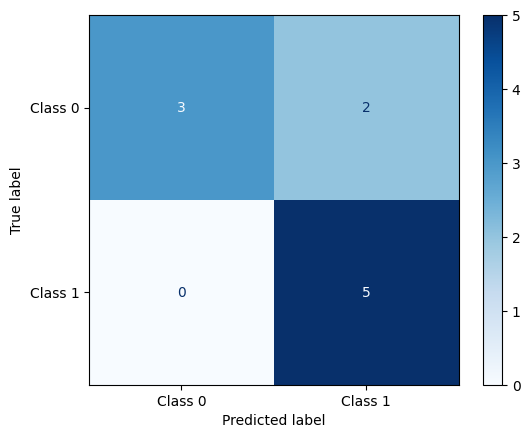

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 훈련 데이터에 대한 예측
z = np.dot(X, weights)
y_pred = (sigmoid(z) >= 0.5).astype(int)  # 0.5 기준으로 분류

# Confusion Matrix 계산
cm = confusion_matrix(y, y_pred)

# Confusion Matrix 출력
print("\nConfusion Matrix:")
print(cm)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")


# 실제로 Decision Boundary가 그려지는 것을 확인해보고 싶어서 시각화

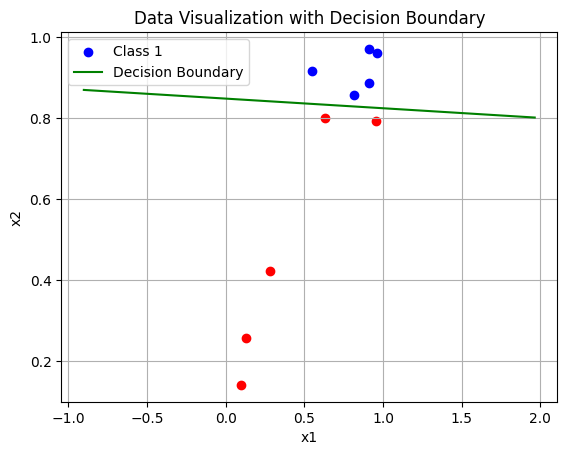

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 가중치(weights)를 기반으로 결정 경계 직선 추가
def plot_with_decision_boundary(x1, x2, y, weights):
    # 데이터 포인트 시각화
    for i in range(len(y)):
        if y[i] == 1:
            plt.scatter(x1[i], x2[i], color='blue', label='Class 1' if i == 0 else "")
        else:
            plt.scatter(x1[i], x2[i], color='red', label='Class 0' if i == 0 else "")

    # 결정 경계 직선 그리기
    # y = -(w0 + w1 * x1) / w2
    x1_range = np.linspace(min(x1) - 1, max(x1) + 1, 100)
    x2_boundary = -(weights[0] + weights[1] * x1_range) / weights[2]

    plt.plot(x1_range, x2_boundary, color='green', label='Decision Boundary')

    # 그래프 스타일 설정
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.title("Data Visualization with Decision Boundary")
    plt.grid(True)
    plt.show()

# 결정 경계 포함된 시각화 호출
plot_with_decision_boundary(x1, x2, y.ravel(), weights)


# 후기
lr과 epoch 그리고 정확도의 상관 관계에 대해서

조작변인 
통제변인